Convolutional Neural Network (using Keras with Tensorflow as backend) is used to train the MNIST Dataset and various results are obtained based on validation accuracy and training accuracy. The dataset is similar to the one used with Machine Learning Algorithms. Most of the necessary explanations are provided in **Using Machine Learning Models** notebook in this repository. Therefore, we will refrain from taking the similar approach with this notebook. Instead, explanations related to the new model will be provided. In a separate notebook -- **Results obtained from ML Models and CNN** graphs will be plotted combining both the Machine Learning and Neural Network appraoches. However, the final report of the project will be linked in the **Wiki** of the repository. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import time
import datetime as dt
np.random.seed(0)
%matplotlib inline

In [2]:
from keras import layers
from keras import models

Using TensorFlow backend.


## DATA PREPROCESSING

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
x_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values
x_test = test.values

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
len1 = x_train.shape[0]
len2 = x_test.shape[0]

In [7]:
x_train = x_train.reshape((len1, 28, 28, 1))
x_test = x_test.reshape((len2, 28, 28, 1))

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                   test_size=0.2, random_state=0)

*y_train* and *y_val* vectors are converted to matrix

In [9]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

Details of Convolutional Neural Network will be discussed in the report (Wiki).
However a brief introduction goes like: we are taking inputs, passing them through layers which do certain processings on the input. Rectified Linear Unit (RELU) is used as an activation function that return the max(0, input). The final layer has 10 nodes for each of the digits from (0-9) that determine the probability of each of the digits. *Convolution2D* and *MaximumPooling2D* are the layers for processings.They change the input in such a way that make CNN very powerful and efficient for Computer Vision.

## TRAINING

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


We need to specify the loss function, optimizer, and the metrics

In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

Training starts with taking x_train, y_train. Epochs is defined as a measure of the number of times all of the training vectors are used once to update the weights. We are using batch of 128 samples. So, for each epoch, 128 samples will be used. Validation will be performed on x_val, y_val.

In [12]:
time_start = dt.datetime.now()
model_log = model.fit(x_train, y_train, epochs=10, batch_size=128, 
                     validation_data = (x_val, y_val))
time_stop = dt.datetime.now()

Instructions for updating:
Use tf.cast instead.
Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 45s 1ms/step - loss: 0.3532 - acc: 0.8887 - val_loss: 0.1423 - val_acc: 0.9569
Epoch 2/10
33600/33600 [==============================] - 46s 1ms/step - loss: 0.0826 - acc: 0.9745 - val_loss: 0.0872 - val_acc: 0.9723
Epoch 3/10
33600/33600 [==============================] - 45s 1ms/step - loss: 0.0518 - acc: 0.9837 - val_loss: 0.0830 - val_acc: 0.9740
Epoch 4/10
33600/33600 [==============================] - 45s 1ms/step - loss: 0.0370 - acc: 0.9884 - val_loss: 0.1556 - val_acc: 0.9555
Epoch 5/10
33600/33600 [==============================] - 47s 1ms/step - loss: 0.0294 - acc: 0.9908 - val_loss: 0.0385 - val_acc: 0.9876
Epoch 6/10
33600/33600 [==============================] - 46s 1ms/step - loss: 0.0230 - acc: 0.9930 - val_loss: 0.0407 - val_acc: 0.9880
Epoch 7/10
33600/33600 [==============================] - 42s 1ms/step - loss: 0.

## MODEL EVALUATION

In [13]:
_, acc_val = model.evaluate(x_val, y_val)
_, acc_train = model.evaluate(x_train, y_train)

33600/33600 [==============================] - 14s 407us/step


In [18]:
print("Training Accuracy: {0:2.2f}%\nValidation Accuracy: {0:2.2f}%".format(acc_train*100, 
                                                             acc_val*100))

Training Accuracy: 99.78%
Validation Accuracy: 99.78%


In [15]:
time_stop - time_start

datetime.timedelta(seconds=447, microseconds=755083)

- Accuracy: 99.78% (training), 99.78% (validation)
- Time taken: 447 seconds

*Accuracy vs. No. Epoch* and *Loss vs. No. Epoch* graphs are plotted for both the Training and Validation.  

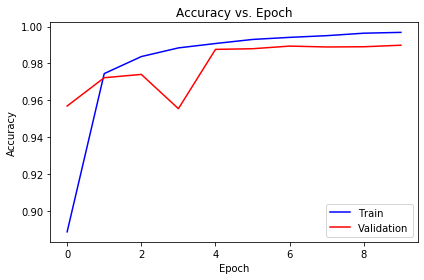

In [20]:
plt.plot(model_log.history['acc'], color='blue', label='Train')
plt.plot(model_log.history['val_acc'], color='red', label='Validation')
plt.title('Accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()

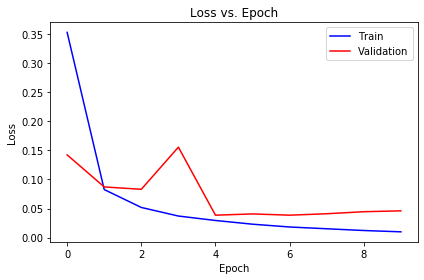

In [21]:
plt.plot(model_log.history['loss'], color='blue', label='Train')
plt.plot(model_log.history['val_loss'], color='red', label='Validation')
plt.title('Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()

In [22]:
y_pred_val = model.predict(x_val)

In [23]:
y_pred_val = np.argmax(y_pred_val, axis=1)

In [24]:
y_val = np.argmax(y_val, axis=1)

In [25]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

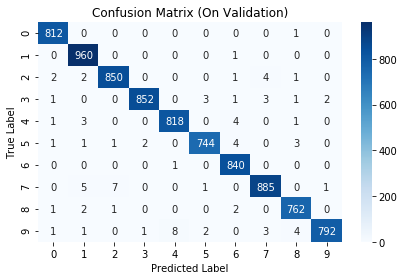

In [26]:
fig = plt.figure()
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (On Validation)')
plt.tight_layout()

In [27]:
y_pred_test = model.predict(x_test)

In [28]:
y_pred_test = np.argmax(y_pred_test, axis=1)

Prediction on first 100 samples of testset  

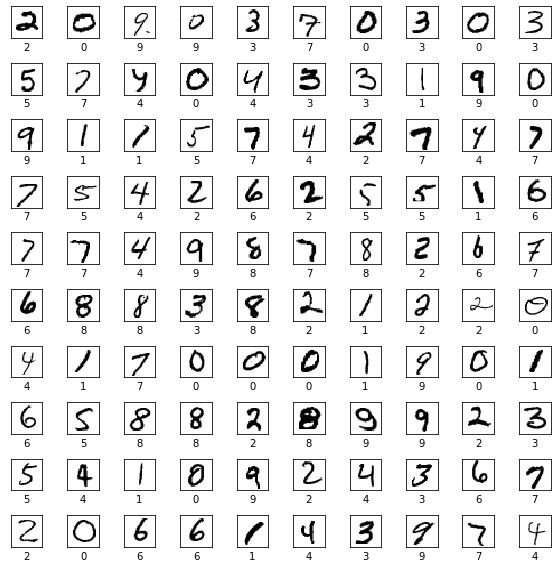

In [30]:
fig, ax = plt.subplots(10, 10, figsize=(8,8))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()